In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:


# Performing a GET Request and saving the 
# API's response within a variable
url = "https://data.cdc.gov/resource/d6p8-wqjm.json"
response = requests.get(url)
response_json = response.json()


In [3]:
# Check if the request was successful
if response.status_code == 200:
    data = response.json()  
    # Convert the response to a Python dictionary
else:
    print("Error:", response.status_code)

In [4]:
headers = {"Authorization": "Bearer YOUR_API_KEY"}
response = requests.get(url, headers=headers)

In [5]:
#data frame
df = pd.DataFrame(data)
df

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,...,crude_primary_series_only_ir,crude_unvax_ir,crude_booster_irr,crude_irr,continuity_correction,age_adj_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_booster_irr,age_adj_irr
0,case,SEP 2021,202138,18-49,all_types,119,307241,52609,52473497,170089,...,100.258231312,486.808747692,12.568706424,4.855548929,0,NaN,NaN,NaN,NaN,NaN
1,case,SEP 2021,202138,50-64,all_types,147,376834,28091,30068369,46391,...,93.423757039,477.565704789,12.242380599,5.111822944,0,NaN,NaN,NaN,NaN,NaN
2,case,SEP 2021,202138,65+,all_types,280,878779,27243,29106029,24190,...,93.599164627,501.793012851,15.748755787,5.361084309,1,NaN,NaN,NaN,NaN,NaN
3,case,SEP 2021,202138,all_ages,all_types,546,1562854,107943,111647895,240670,...,96.681625749,486.453966012,13.924112209,5.031503786,0,37.618215603,97.743583411,487.492641919,12.958951777,4.987464393
4,case,SEP 2021,202138,all_ages,Janssen,7,28692,11003,9567298,240670,...,115.006347665,486.453966012,19.939053133,4.229801014,0,31.020156501,114.456488571,487.492641919,15.71535082,4.259196206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,death,AUG 2022,202235,65+,all_types,361,22134591,182,9532968,312,...,1.909164071,11.203666644,6.869489719,5.868362396,1,NaN,NaN,NaN,NaN,NaN
821,death,AUG 2022,202235,all_ages,all_types,387,70119086,216,72791964,398,...,0.296736052,0.782652535,1.418058925,2.637537738,1,0.250457648,0.298914045,1.741129532,6.951792245,5.824850199
822,death,AUG 2022,202235,all_ages,Janssen,13,4088735,20,6661494,398,...,0.300232951,0.782652535,2.461583702,2.606817583,1,0.230421155,0.328554396,1.741129532,7.55629201,5.299364595
823,death,AUG 2022,202235,all_ages,Moderna,201,27423832,85,21995068,398,...,0.386450271,0.782652535,1.067827444,2.025234791,1,0.284921657,0.264907485,1.741129532,6.110906248,6.572594698


In [6]:
# Check for missing values

print(df.isnull().sum())

outcome                               0
month                                 0
mmwr_week                             0
age_group                             0
vaccine_product                       0
boosted_with_outcome                  0
boosted_population                    0
primary_series_only_with_outcome      0
primary_series_only_population        0
unvaccinated_with_outcome             0
unvaccinated_population               0
crude_booster_ir                      0
crude_primary_series_only_ir          0
crude_unvax_ir                        0
crude_booster_irr                    56
crude_irr                            39
continuity_correction                 0
age_adj_booster_ir                  413
age_adj_vax_ir                      413
age_adj_unvax_ir                    413
age_adj_booster_irr                 419
age_adj_irr                         413
dtype: int64


In [7]:
# Replace 'NaN' with 0 
df.fillna(0, inplace=True)



In [8]:
#filtered by death rows in outcome column
death_df = df[df['outcome'] == 'death']
death_df

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,...,crude_primary_series_only_ir,crude_unvax_ir,crude_booster_irr,crude_irr,continuity_correction,age_adj_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_booster_irr,age_adj_irr
426,death,SEP 2021,202138,18-49,all_types,0,297687,46,49768966,696,...,0.092427076,2.074256351,0,22.442085608,0,0,0,0,0,0
427,death,SEP 2021,202138,50-64,all_types,2,360891,150,28284539,1421,...,0.530325066,15.344559878,27.688567795,28.934253488,0,0,0,0,0,0
428,death,SEP 2021,202138,65+,all_types,18,837953,1082,27267237,2388,...,3.968132158,50.096923281,23.321592863,12.6248122,1,0,0,0,0,0
429,death,SEP 2021,202138,all_ages,all_types,20,1496531,1278,105320742,4505,...,1.213436191,9.467952597,7.084542284,7.802596187,0,0.477717198,0.84080715,12.932078132,27.070572687,15.38055205
430,death,SEP 2021,202138,all_ages,Janssen,0,29242,113,9011732,4505,...,1.253921,9.467952597,0,7.550677114,0,0,1.334074941,12.932078132,0,9.693666923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,death,AUG 2022,202235,65+,all_types,361,22134591,182,9532968,312,...,1.909164071,11.203666644,6.869489719,5.868362396,1,0,0,0,0,0
821,death,AUG 2022,202235,all_ages,all_types,387,70119086,216,72791964,398,...,0.296736052,0.782652535,1.418058925,2.637537738,1,0.250457648,0.298914045,1.741129532,6.951792245,5.824850199
822,death,AUG 2022,202235,all_ages,Janssen,13,4088735,20,6661494,398,...,0.300232951,0.782652535,2.461583702,2.606817583,1,0.230421155,0.328554396,1.741129532,7.55629201,5.299364595
823,death,AUG 2022,202235,all_ages,Moderna,201,27423832,85,21995068,398,...,0.386450271,0.782652535,1.067827444,2.025234791,1,0.284921657,0.264907485,1.741129532,6.110906248,6.572594698


In [9]:
#dropp colmns
df_drop_column =death_df.drop(columns=['continuity_correction','crude_booster_irr','crude_irr',
                                          'age_adj_booster_ir', 'age_adj_vax_ir','age_adj_unvax_ir',
                                          'age_adj_booster_irr','age_adj_irr'])
df_drop_column.shape

(399, 14)

In [10]:
#filltered by all_ages from 'age_group' column
filtered_df = df_drop_column [df_drop_column  ['age_group'] != 'all_ages']
filtered_df

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,unvaccinated_population,crude_booster_ir,crude_primary_series_only_ir,crude_unvax_ir
426,death,SEP 2021,202138,18-49,all_types,0,297687,46,49768966,696,33554194,0,0.092427076,2.074256351
427,death,SEP 2021,202138,50-64,all_types,2,360891,150,28284539,1421,9260611,0.55418395,0.530325066,15.344559878
428,death,SEP 2021,202138,65+,all_types,18,837953,1082,27267237,2388,4766759.8,2.148091838,3.968132158,50.096923281
433,death,SEP 2021,202139,18-49,all_types,2,362201,33,50683328,554,32923002,0.552179591,0.065110168,1.68271411
434,death,SEP 2021,202139,50-64,all_types,3,436135,137,28508685,1126,9077968,0.68786041,0.480555311,12.403656854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,death,AUG 2022,202235,5-11,all_types,0,799056,0,4771034,0,12628880,0,0,0
817,death,AUG 2022,202235,12-17,all_types,0,2959504,0,6950266,0,5975801,0,0,0
818,death,AUG 2022,202235,18-49,all_types,6,25588220,8,37041267,19,23447781.75,0.0234483,0.0215975,0.081031119
819,death,AUG 2022,202235,50-64,all_types,20,18637715,26,14496429,67,6015441.600000001,0.107309292,0.179354516,1.11380019


In [11]:
filtered_df .loc[:,'primary_series_only_with_outcome'] = filtered_df ['primary_series_only_with_outcome'].astype(float)
filtered_df .loc[:,'primary_series_only_population'] = filtered_df ['primary_series_only_population'].astype(float)
filtered_df .loc[:,'unvaccinated_with_outcome'] = filtered_df ['unvaccinated_with_outcome'].astype(float)
filtered_df .loc[:,'unvaccinated_population'] = filtered_df ['unvaccinated_population'].astype(float)
filtered_df .loc[:,'boosted_with_outcome'] = filtered_df ['boosted_with_outcome'].astype(float)
filtered_df .loc[:,'boosted_population'] = filtered_df ['boosted_population'].astype(float)


In [12]:
# calculaet death rate of vaccinated,unvacinated and bosted 
vacc_death_rate= (filtered_df ['primary_series_only_with_outcome'] / filtered_df ['primary_series_only_population'])*100000 
Unvac_death_rate= (filtered_df ['unvaccinated_with_outcome'] / filtered_df ['unvaccinated_population']) *100000
Boosted_death_rate= (filtered_df ['boosted_with_outcome'] / filtered_df ['boosted_population']) *100000

In [13]:
max_vacc_rate = vacc_death_rate.max()
max_unvac_rate = Unvac_death_rate.max()
max_boosted_rate = Boosted_death_rate.max()

max_rate = max(max_vacc_rate, max_unvac_rate, max_boosted_rate)
print("Maximum Death Rate:", max_rate)

Maximum Death Rate: 166.70788757102093


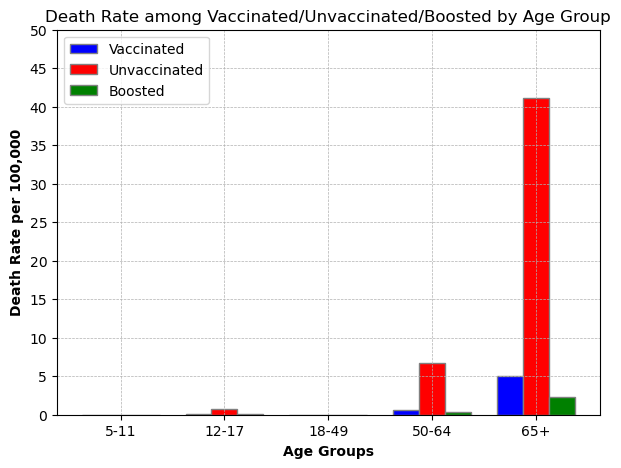

In [14]:
#plotted a bar graph
# Group by age group and calculate mean death rates
grouped = filtered_df .groupby('age_group').agg({
    'primary_series_only_with_outcome': 'sum',
    'primary_series_only_population': 'sum',
    'unvaccinated_with_outcome': 'sum',
    'unvaccinated_population': 'sum',
    'boosted_with_outcome': 'sum',
    'boosted_population': 'sum'
}).reset_index()

vacc_death_rate = (grouped['primary_series_only_with_outcome'] / grouped['primary_series_only_population']) * 100000
Unvac_death_rate = (grouped['unvaccinated_with_outcome'] / grouped['unvaccinated_population']) * 100000
Boosted_death_rate = (grouped['boosted_with_outcome'] / grouped['boosted_population']) * 100000
# Convert the 'age_group' column to a categorical type with the defined order
age_order = ['5-11', '12-17', '18-49', '50-64', '65+',]
grouped['age_group'] = pd.Categorical(grouped['age_group'], categories=age_order, ordered=True)

# Sort the DataFrame based on the categorical order
grouped = grouped.sort_values('age_group')

#  plot the bar graph 
bar_width = 0.25
r1 = np.arange(len(grouped))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(7, 5))

plt.bar(r1, vacc_death_rate, color='b', width=bar_width, edgecolor='grey', label='Vaccinated')
plt.bar(r2, Unvac_death_rate, color='r', width=bar_width, edgecolor='grey', label='Unvaccinated')
plt.bar(r3, Boosted_death_rate, color='g', width=bar_width, edgecolor='grey', label='Boosted')

plt.title('Death Rate among Vaccinated/Unvaccinated/Boosted by Age Group')
plt.xlabel('Age Groups', fontweight='bold')
plt.ylabel('Death Rate per 100,000', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(grouped))], grouped['age_group'])

plt.yticks(np.arange(0, max(Boosted_death_rate + vacc_death_rate + Unvac_death_rate) + 5, 5))
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

#The blue bars represent the death rate for vaccinated individuals.
#The red barsrepresent the death rate for unvaccinated individuals.
#The green bars represent the death rate for individuals who received a booster.
#this visualization allows to see the total death rate for each age group while also breaking it down by vaccination status
# It expressed if death rate of 5 per 100,000, it means that for every 100,000 people in the population, 
# it means 5 deaths occurred over a specific period (weekly).



In [15]:
grouped["age_group"]

2     5-11
0    12-17
1    18-49
3    50-64
4      65+
Name: age_group, dtype: category
Categories (5, object): ['5-11' < '12-17' < '18-49' < '50-64' < '65+']

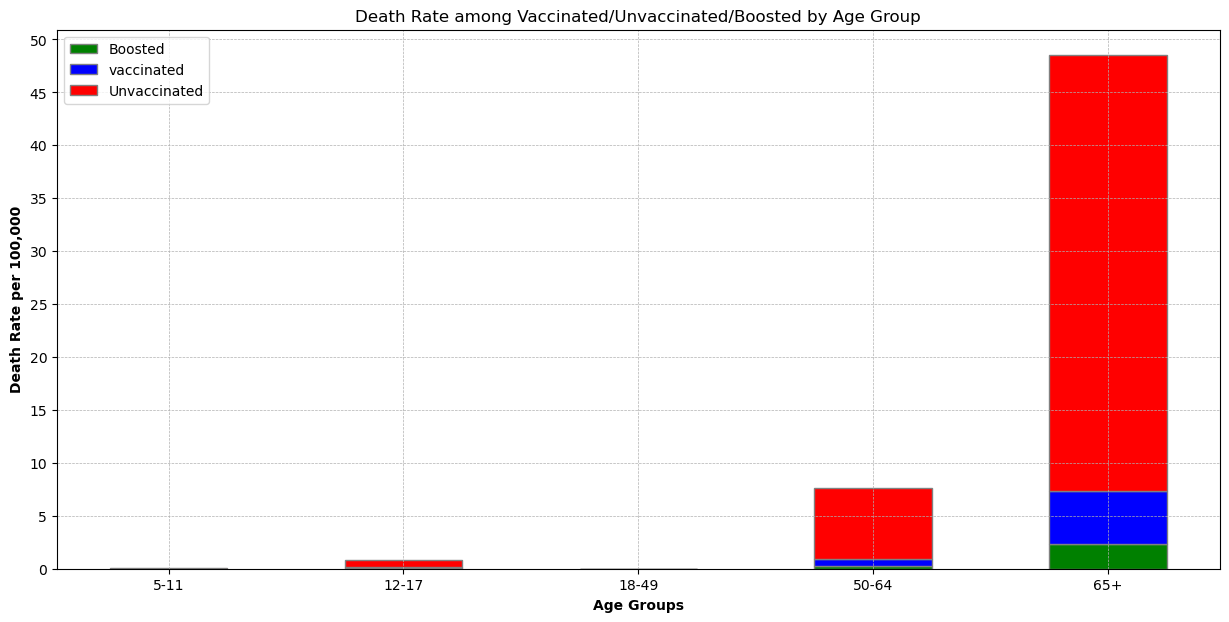

In [16]:
bar_width = 0.5
r = np.arange(len(grouped))

plt.figure(figsize=(15, 7))

plt.bar(r, Boosted_death_rate, color='g', width=bar_width, edgecolor='grey', label='Boosted')
plt.bar(r, vacc_death_rate, bottom=Boosted_death_rate, color='b', width=bar_width, edgecolor='grey', label='vaccinated')
plt.bar(r, Unvac_death_rate, bottom=vacc_death_rate+Boosted_death_rate, color='r', width=bar_width, edgecolor='grey', label='Unvaccinated')

plt.title('Death Rate among Vaccinated/Unvaccinated/Boosted by Age Group')
plt.xlabel('Age Groups', fontweight='bold')
plt.ylabel('Death Rate per 100,000', fontweight='bold')
plt.xticks(r, grouped['age_group'])

plt.yticks(np.arange(0, max(Boosted_death_rate + vacc_death_rate + Unvac_death_rate) + 5, 5))
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


#The green bars represent the death rate for individuals who received a booster.
#The blue bars(stacked on top of the green bars)  represent the death rate for vaccinated individuals.
#The red bars(stacked on top of the combined blue green bars) represent the death rate for unvaccinated individuals.

#this visualization allows you to see the total death rate for each age group while also breaking it down by vaccination status.

# It expressed if death rate of 5 per 100,000, it means that for every 100,000 people in the population, 
# it means 5 deaths occurred over a specific period (weekly).


In [17]:
# Group by age group
grouped = filtered_df.groupby('age_group').agg({
    'primary_series_only_with_outcome': 'sum',
    'primary_series_only_population': 'sum',
    'unvaccinated_with_outcome': 'sum',
    'unvaccinated_population': 'sum',
    'boosted_with_outcome': 'sum',
    'boosted_population': 'sum'
}).reset_index()

# Calculate death rates
grouped['vacc_death_rate'] = (grouped['primary_series_only_with_outcome'] / grouped['primary_series_only_population']) * 100000
grouped['Unvac_death_rate'] = (grouped['unvaccinated_with_outcome'] / grouped['unvaccinated_population']) * 100000
grouped['Boosted_death_rate'] = (grouped['boosted_with_outcome'] / grouped['boosted_population']) * 100000

print(grouped[['age_group', 'vacc_death_rate', 'Unvac_death_rate', 'Boosted_death_rate']])

  age_group vacc_death_rate Unvac_death_rate Boosted_death_rate
0     12-17        0.005977         0.025222             0.0026
1     18-49        0.073075         0.732082           0.046902
2      5-11        0.001559         0.006008                0.0
3     50-64         0.62695         6.739301           0.302722
4       65+        5.037549        41.139444           2.320062
